In [60]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib.text as text
from mpl_toolkits.mplot3d import Axes3D

## Linear regression

$$ y_i = x_{ij} w_j + b$$

$$ y_i = x_{ij} w_j, \quad x_{i,-1}=1,\quad b=w_{-1} $$

In [61]:
def linear(x,w):
    return x @ w

Generate a random feature vector $\mathbf{x}$ witch 10000 samples and three feature 
such that first feature is drawn from N(0,1), second feature from  U(,1) and third from N(1,2).

N(mu,sigma) denotes normal distribution with mean mu and standard deviation sigma. You can use ``numpy.random.normal`` and ``numpy.random.uniform`` functions.

Using $\mathbf{x}$ and weights w = [0.2, 0.5,-0.25,1.0] generate output $\mathbf{y}$ assuming a $N(0,0.1)$ noise $\mathbf{\epsilon}$. 

$$ y_i = x_{ij} w_j+\epsilon_i, \quad x_{i,-1}=1,\quad b=w_{-1} $$

#### Loss

In [62]:
def loss(x, y):
    return np.sum(np.power(x-y,2)/x.shape[0]/2)

def torch_loss(x, y):
    return (torch.pow(x-y,2)/x.shape[0]/2).sum()

$$ \frac{1}{2}\frac{1}{N}\sum_{i=0}^{N-1} (y_i -  x_{ij} w_j  )^2$$

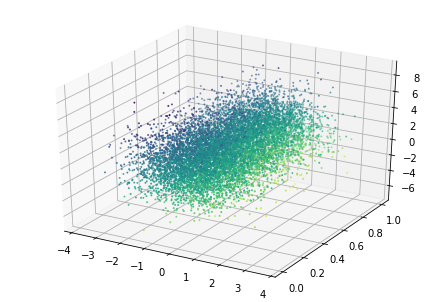

In [63]:
size = 10000
ground_truth = np.array([0.2,0.5,-0.25, 1])
arr1 = np.random.normal(0,1,size)
arr2 = np.random.uniform(0,1,size)
arr3 = np.random.normal(1,2,size)
arr4 = np.ones_like(arr1)
data = np.stack([arr1,arr2,arr3, arr4], axis=1)

y = linear(data, ground_truth) + np.random.normal(0,0.1,size)

weights = np.array([1,1,1,1])
output = linear(data, weights)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0],data[:,1],data[:,2], s=1, c = y)
plt.show()

## Gradient descent 

### Problem 1 

Find the gradient of the loss function with respect to weights.

Write gradient function ``grad(y,x,w)``.

In [64]:
def grad(y, x, w):
    return (1/len(y))*(x@w@x - y@x)

### Problem 2

Implement gradient descent for linear regression.

In [65]:
weights = np.array([1.,1.,1.,1.])
lr = 0.1
output = linear(data, weights)
print(loss(output, y))

for i in range(1000):
    weights -= lr * grad(y, data, weights)
    
output = linear(data, weights)
print(loss(output, y))
print("Learned",weights)
print("Source ",ground_truth)

4.612440850694822
0.005007663069904829
Learned [ 0.20053295  0.50280757 -0.25045029  1.00021906]
Source  [ 0.2   0.5  -0.25  1.  ]


### Problem 3 - na potem

Implement stochastic gradient descent (SGD).

### Problem 4

Implement GD using pytorch. Start by just rewritting Problem 3 to use torch Tensors instead of numpy arrays. 

To convert from numpy arrays to torch tensors you can use ``torch.from_numpy()`` function. 

In [66]:
data = torch.from_numpy(data).float()
y = torch.from_numpy(y).float()


In [67]:
weights = torch.Tensor([1.,1.,1.,1.]).float()
lr = 0.1
output = linear(data, weights)
print(torch_loss(output, y).item())

for i in range(1000):
    weights -= lr * grad(y, data, weights)
    
output = linear(data, weights)
print(torch_loss(output, y).item())
print("Learned",weights)
print("Source ",ground_truth)

4.612441062927246
0.005007663741707802
Learned tensor([ 0.2005,  0.5028, -0.2505,  1.0002])
Source  [ 0.2   0.5  -0.25  1.  ]


### Problem 5 - na potem

Implement SGD using pytorch automatic differentiation.

To this end the variable with respect to which the gradient will be calculated, ``t_w`` in this case, must have attribute
``requires_grad`` set to ``True`` (``t_w.require_grad=True``).

The torch will automatically track any expression containing ``t_w`` and store its computational graph. The method ``backward()`` can be run on the final expression to back propagate the gradient e.g. ``loss.backward()``. Then the gradient is accesible as ``t_w.grad``.